<a href="https://colab.research.google.com/github/mariotko9/aprendizado_de_maquina/blob/main/Checkout2ApMaq.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# monta o drive para usar os dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Importando as bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

# Carregar o dataset
df = pd.read_csv('/content/drive/My Drive/abalone.csv')

In [3]:
# Mostra as 5 primeiras e 5 ultimas linhas, mostra quantidade de linhas e
# colunas
print(df)

     Sex  Length  Diameter  Height  Whole weight  Shucked weight  \
0      M   0.455     0.365   0.095        0.5140          0.2245   
1      M   0.350     0.265   0.090        0.2255          0.0995   
2      F   0.530     0.420   0.135        0.6770          0.2565   
3      M   0.440     0.365   0.125        0.5160          0.2155   
4      I   0.330     0.255   0.080        0.2050          0.0895   
...   ..     ...       ...     ...           ...             ...   
4172   F   0.565     0.450   0.165        0.8870          0.3700   
4173   M   0.590     0.440   0.135        0.9660          0.4390   
4174   M   0.600     0.475   0.205        1.1760          0.5255   
4175   F   0.625     0.485   0.150        1.0945          0.5310   
4176   M   0.710     0.555   0.195        1.9485          0.9455   

      Viscera weight  Shell weight  Rings  
0             0.1010        0.1500     15  
1             0.0485        0.0700      7  
2             0.1415        0.2100      9  
3      

In [4]:
# Exploração inicial dos dados
print(df.shape)       # Exibe quantidade de linhas (tuplas) e colunas

(4177, 9)


In [5]:
print(df.info())      # Exibe as informações do dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB
None


In [6]:
print(df.describe())  # Resumo descritivo das colunas numéricas

            Length     Diameter       Height  Whole weight  Shucked weight  \
count  4177.000000  4177.000000  4177.000000   4177.000000     4177.000000   
mean      0.523992     0.407881     0.139516      0.828742        0.359367   
std       0.120093     0.099240     0.041827      0.490389        0.221963   
min       0.075000     0.055000     0.000000      0.002000        0.001000   
25%       0.450000     0.350000     0.115000      0.441500        0.186000   
50%       0.545000     0.425000     0.140000      0.799500        0.336000   
75%       0.615000     0.480000     0.165000      1.153000        0.502000   
max       0.815000     0.650000     1.130000      2.825500        1.488000   

       Viscera weight  Shell weight        Rings  
count     4177.000000   4177.000000  4177.000000  
mean         0.180594      0.238831     9.933684  
std          0.109614      0.139203     3.224169  
min          0.000500      0.001500     1.000000  
25%          0.093500      0.130000     8.

In [7]:
# Verificar valores ausentes (nulos)
print(df.isnull().sum())

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64


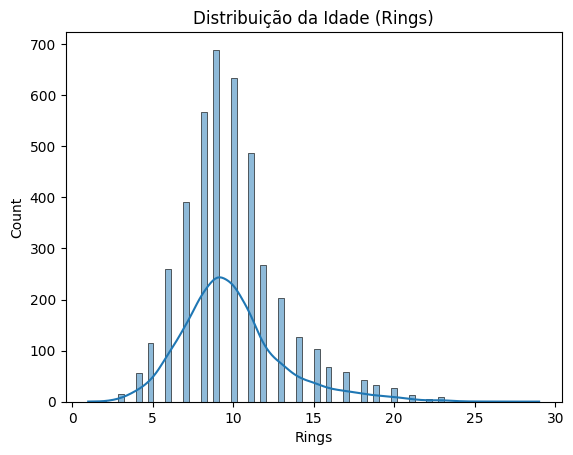

In [8]:
# Visualização das distribuições de Idade (Rings)
sns.histplot(df['Rings'], kde=True)
plt.title('Distribuição da Idade (Rings)')
plt.show()

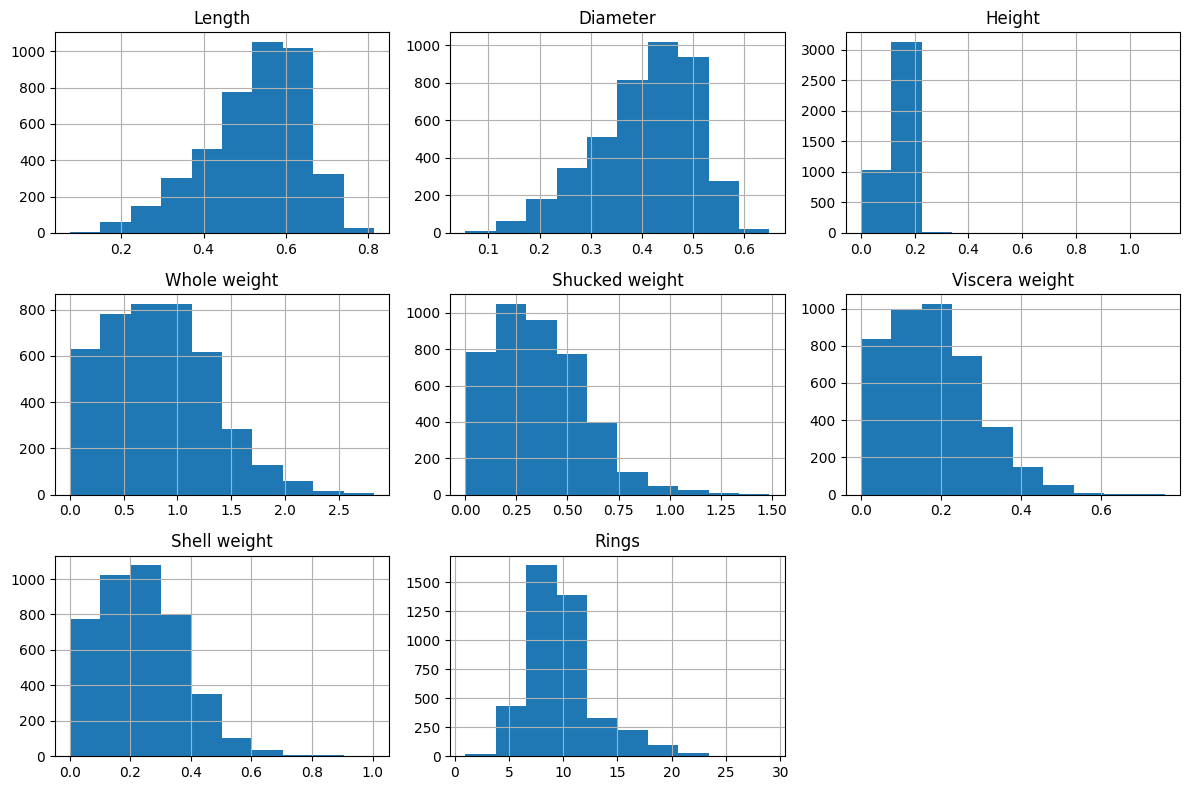

In [9]:
# Histograma de todas as variáveis
df.hist(figsize=(12, 8))
plt.tight_layout()
plt.show()

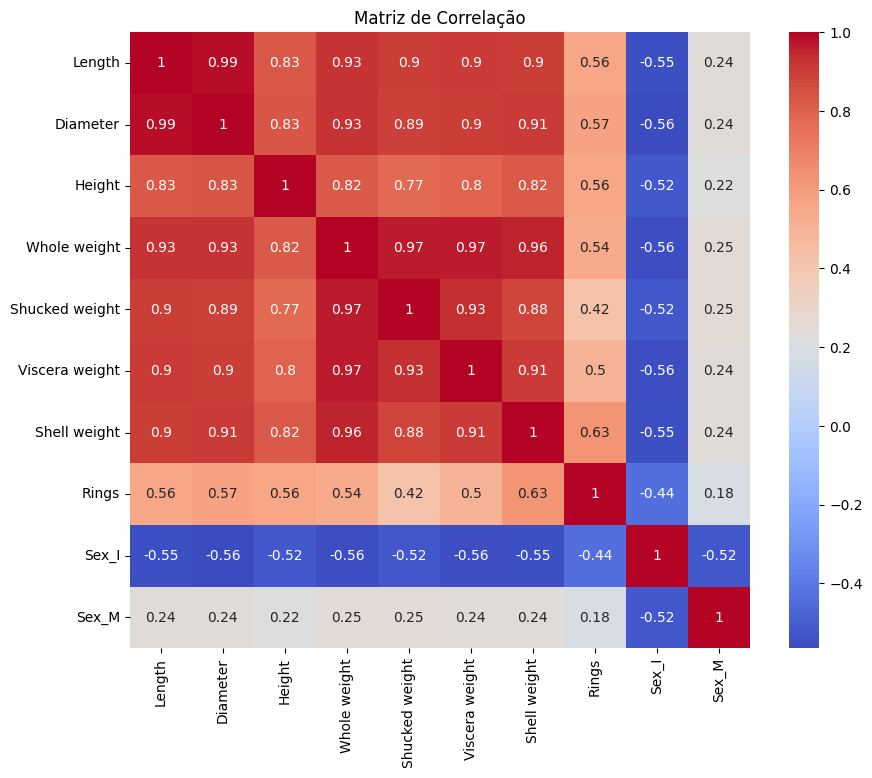

In [14]:
# Mapa de correlação
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Matriz de Correlação")
plt.show()

In [11]:
# Preparação dos dados
# Transformar variável categórica 'Sex' em dummies
df = pd.get_dummies(df, columns=['Sex'], drop_first=True)
# Separar variáveis
X = df.drop('Rings', axis=1)
y = df['Rings']
# Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [12]:
# Treinamento do modelo
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [13]:
# Avaliação do modelo
y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f'R²: {r2:.2f}')
print(f'RMSE: {rmse:.2f}')

R²: 0.55
RMSE: 2.21


**Interpretação detalhada do resultado**

O modelo de regressão linear múltipla apresentou um R² de 0.55, o que significa que ele consegue explicar cerca de 55% da variação na idade dos abalones com base nas variáveis físicas medidas. Esse valor é considerado moderado: o modelo tem algum poder preditivo, mas ainda deixa 45% da variação sem explicação, o que pode indicar que há outros fatores relevantes não incluídos ou que a relação entre as variáveis não é totalmente linear.
O RMSE de 2.21 indica que, em média, o modelo erra a previsão da idade por cerca de 2 anéis. Como a idade real é calculada como Rings + 1.5, esse erro pode representar uma diferença de até 2 anos de vida, o que pode ser significativo dependendo do contexto — por exemplo, em estudos de crescimento ou sustentabilidade.

**Limitações do modelo**

Linearidade: A regressão linear assume que a relação entre as variáveis é linear, o que pode não ser verdade para todos os atributos.

Multicolinearidade: Algumas variáveis podem estar correlacionadas entre si, o que distorce os coeficientes.

Distribuição dos resíduos: Se os erros não forem distribuídos normalmente ou tiverem variância desigual, o modelo pode ser menos confiável.

Variável categórica simplificada: A transformação da variável "Sex" em dummies pode não capturar nuances biológicas entre os sexos.

**Sugestões de melhorias**

Testar modelos não lineares, como árvores de decisão, Random Forest ou SVM, que podem capturar padrões mais complexos.
Aplicar transformações nas variáveis (como log ou polinômios) para melhorar a linearidade.
Usar validação cruzada para garantir que o modelo generalize bem.
